# 0. Data Processing

In [1]:
import pandas as pd

In [2]:
wines = pd.read_csv("wine_dataset.csv")
pd.options.display.max_columns = None
wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
wines.shape

(6497, 13)

### 0-1. Handling Imbalanced Dataset

In [4]:
from sklearn.utils import resample

In [5]:
wines["style"].value_counts()

white    4898
red      1599
Name: style, dtype: int64

In [6]:
wines_w = wines[wines["style"] == "white"]
wines_r = wines[wines["style"] == "red"]

In [7]:
wines_w_d = resample(wines_w, n_samples=1599, replace=False, random_state=0)

In [8]:
wines_d = pd.concat([wines_w_d, wines_r], axis=0)

In [9]:
wines_d["style"].value_counts()

white    1599
red      1599
Name: style, dtype: int64

### 0-2. Define Y and X

In [10]:
wines_d.columns.get_loc("style")

12

In [11]:
y = wines_d.iloc[:,12]

In [12]:
col = list(range(0, 13))
del col[12]

In [13]:
x = wines_d.iloc[:, col]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=15)

# 1. Prediction Models

## 1-1. Decision Trees

In [16]:
from sklearn.tree import DecisionTreeClassifier

### 1) Criterion = entropy

In [17]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np

In [18]:
nums_d = range(1, 20)

In [19]:
for n in nums_d: 
    dtc = DecisionTreeClassifier(criterion="entropy", max_depth= n, random_state= 0)
    scores = cross_val_score(dtc, x, y, cv=5)
    print(n, ":", np.mean(scores))

1 : 0.9121209898278562
2 : 0.9246464201877934
3 : 0.9631015258215964
4 : 0.9734208724569641
5 : 0.9718564162754303
6 : 0.9721698943661972
7 : 0.9743578834115805
8 : 0.9718554381846636
9 : 0.9737299491392802
10 : 0.9734174491392802
11 : 0.9731049491392803
12 : 0.9731049491392803
13 : 0.9731049491392803
14 : 0.9731049491392803
15 : 0.9731049491392803
16 : 0.9731049491392803
17 : 0.9731049491392803
18 : 0.9731049491392803
19 : 0.9731049491392803


<BarContainer object of 19 artists>

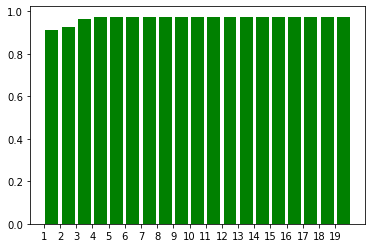

In [20]:
# visualization

d = dict()

for n in nums_d: 
    dtc = DecisionTreeClassifier(criterion="entropy", max_depth= n, random_state= 0)
    dtc.result = dtc.fit(x_train, y_train)
    y_pred = dtc.predict(x_test)
    scores = cross_val_score(dtc, x, y, cv=5)
    cv_m = np.mean(scores)
    d[n]=cv_m
    
from matplotlib import pyplot as plt

pos = np.arange(len(d.keys()))
width = 1.0

ax = plt.axes()
ax.set_xticks(pos + (width/2))
ax.set_xticklabels(d.keys())

plt.bar(d.keys(), d.values(), color = 'g')

### 2) Criterion = gini

In [21]:
for n in nums_d: 
    dtc = DecisionTreeClassifier(criterion="gini", max_depth= n, random_state= 0)
    scores = cross_val_score(dtc, x, y, cv=5)
    print(n, ":", np.mean(scores))

1 : 0.9121209898278562
2 : 0.9446542449139279
3 : 0.9571532668231612
4 : 0.9677865805946793
5 : 0.9702904929577464
6 : 0.9706015258215963
7 : 0.9731054381846634
8 : 0.9737314162754304
9 : 0.9743573943661972
10 : 0.9721694053208138
11 : 0.9721698943661972
12 : 0.9715439162754305
13 : 0.971233372456964
14 : 0.9721698943661972
15 : 0.9712323943661973
16 : 0.9718564162754305
17 : 0.9727948943661971
18 : 0.9731069053208138
19 : 0.9724809272300469


#### - Evaluation of Decision Tree at max_depth = 14 with entropy

+ Precision, recall, f1-score 

In [22]:
dtc = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, random_state= 0)
dtc.result = dtc.fit(x_train, y_train)
y_pred_d = dtc.predict(x_test)

In [23]:
print(metrics.classification_report(y_test, y_pred_d))

              precision    recall  f1-score   support

         red       0.98      0.98      0.98       473
       white       0.98      0.98      0.98       487

    accuracy                           0.98       960
   macro avg       0.98      0.98      0.98       960
weighted avg       0.98      0.98      0.98       960



+ Accuracy score

In [24]:
metrics.accuracy_score(y_test, y_pred_d)

0.9770833333333333

+ Confusion matrix 

In [25]:
metrics.confusion_matrix(y_test, y_pred_d)

array([[462,  11],
       [ 11, 476]], dtype=int64)

In [26]:
cfm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_d))
cfm.index.name = "True"
cfm.columns.name = "Predicted"
cfm

Predicted,0,1
True,,
0,462,11
1,11,476


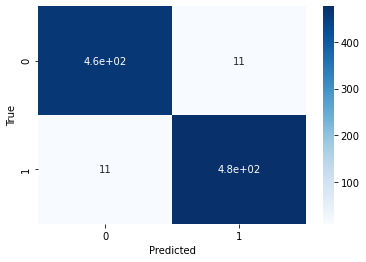

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cfm, annot=True, cmap="Blues")
plt.show()

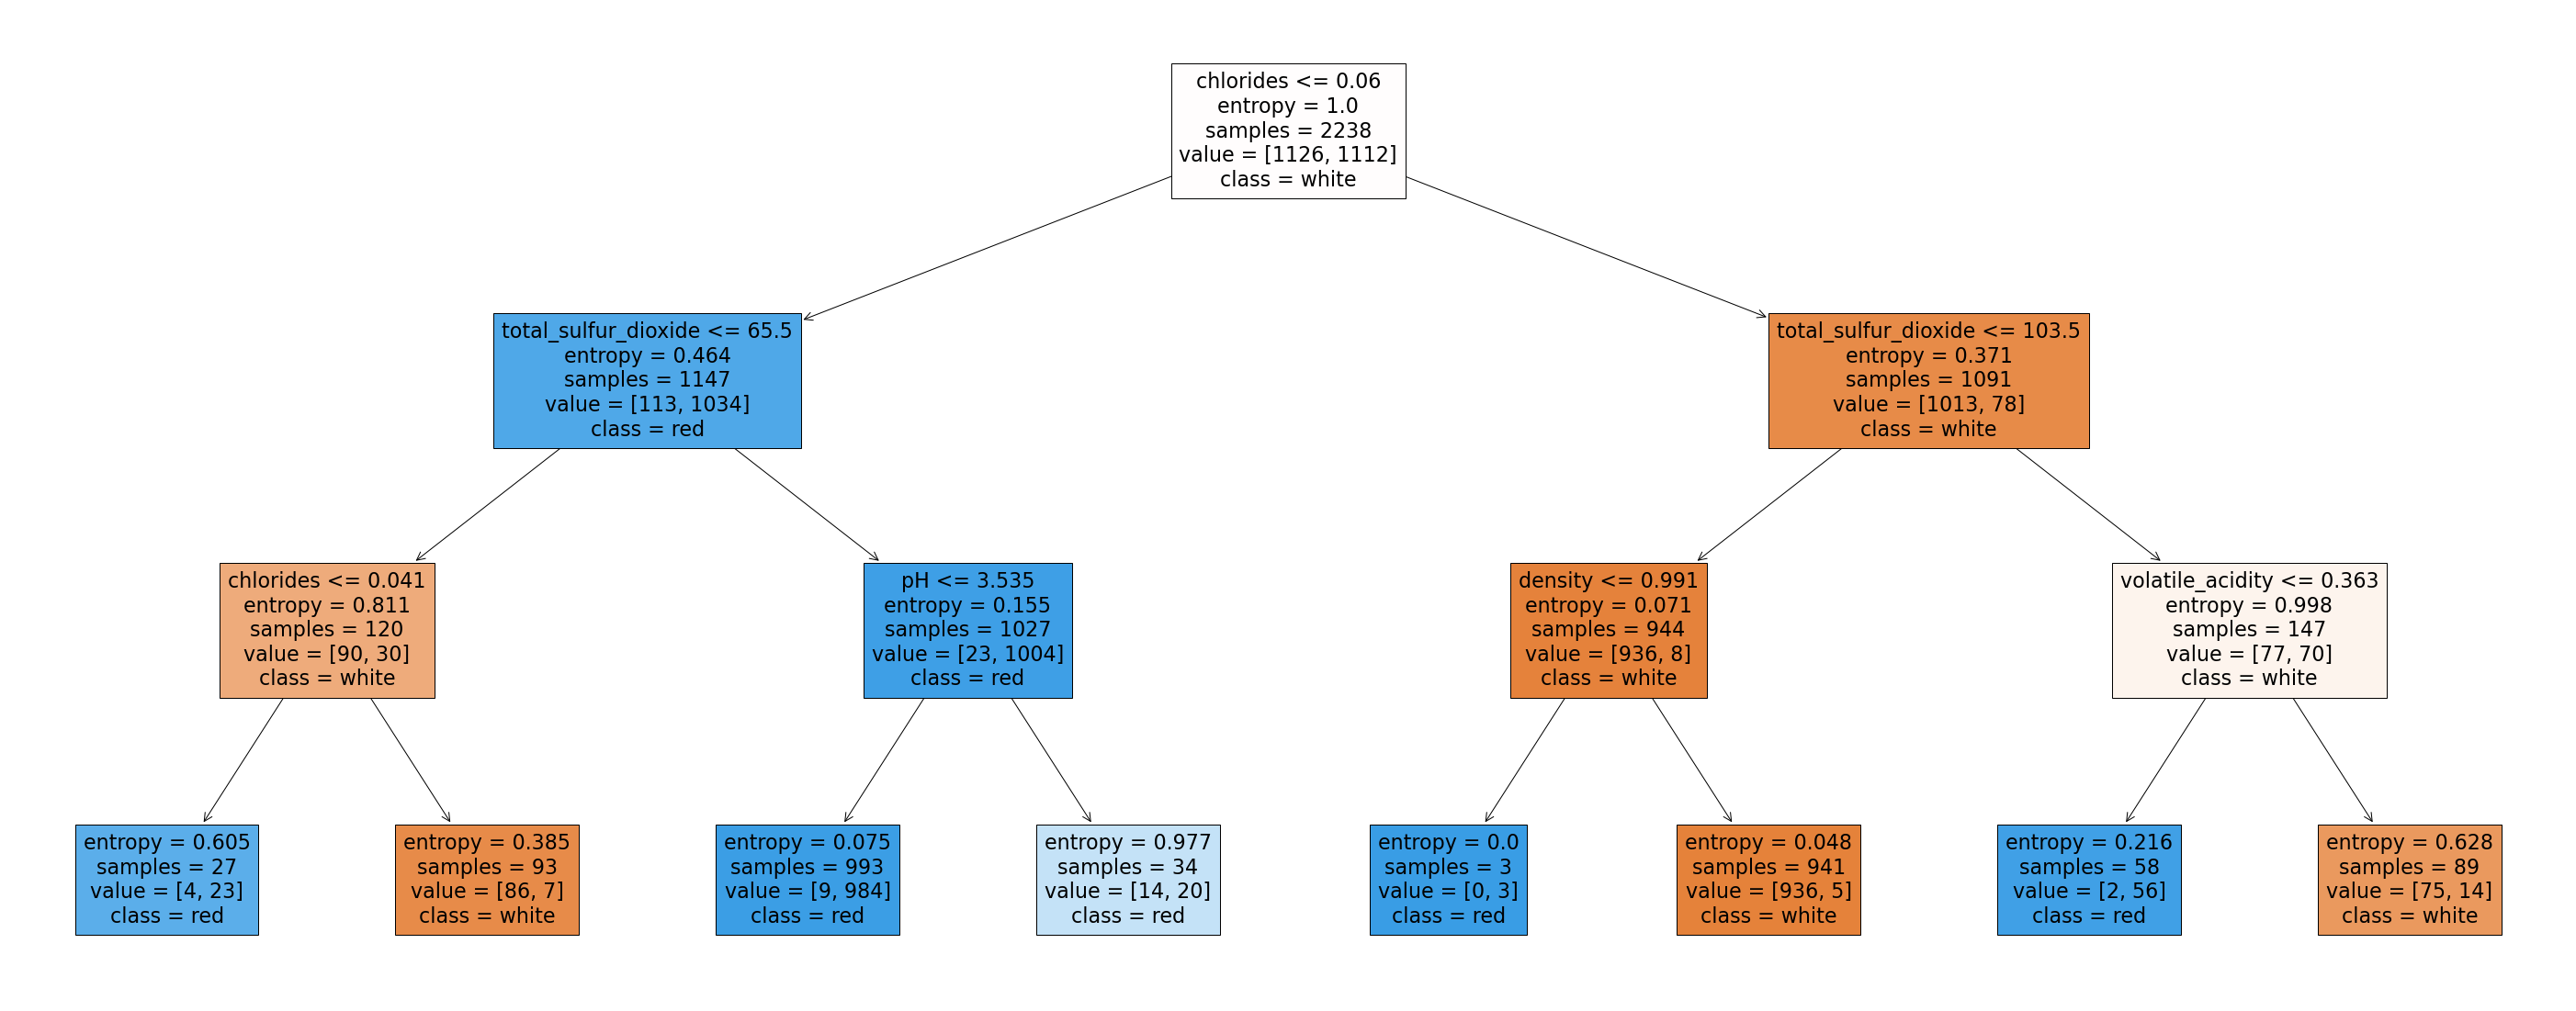

In [28]:
from sklearn.tree import plot_tree

dtc = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, random_state = 0)
dtc.result = dtc.fit(x_train, y_train)

class_names = wines_d["style"].value_counts().keys().tolist()
plt.figure(figsize=(50, 20))
plot_tree(dtc.result, feature_names = x.columns, class_names = class_names, filled=True)

plt.show()

## 1-2. Random Forest

### 1) Criterion = entropy

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [30]:
nums_r = range(2, 35)

In [31]:
for n in nums_r:
    rfc = RandomForestClassifier(criterion="entropy", n_estimators=n, random_state=0)
    scores = cross_val_score(rfc, x, y, cv=5)
    print(n,":",np.mean(scores))

2 : 0.9612284820031298
3 : 0.978733372456964
4 : 0.9790463615023475
5 : 0.9824853286384977
6 : 0.982173317683881
7 : 0.9868637519561816
8 : 0.9856137519561814
9 : 0.9878017410015649
10 : 0.9874892410015649
11 : 0.9878017410015649
12 : 0.9893661971830985
13 : 0.9874897300469485
14 : 0.9878032081377152
15 : 0.9884286971830987
16 : 0.9881161971830986
17 : 0.9887416862284821
18 : 0.9887416862284819
19 : 0.9890536971830987
20 : 0.9890541862284821
21 : 0.9896796752738654
22 : 0.9896796752738656
23 : 0.9896796752738656
24 : 0.9890546752738654
25 : 0.9896796752738656
26 : 0.9896796752738656
27 : 0.9896796752738656
28 : 0.9896796752738656
29 : 0.9896791862284819
30 : 0.9893666862284821
31 : 0.9884282081377151
32 : 0.9890541862284821
33 : 0.9893666862284821
34 : 0.9890541862284821


### 2) Criterion = gini

In [32]:
for n in nums_r:
    rfc = RandomForestClassifier(criterion="gini", n_estimators=n, random_state=0)
    scores = cross_val_score(rfc, x, y, cv=5)
    print(n,":",np.mean(scores))

2 : 0.9674750586854459
3 : 0.9812353286384976
4 : 0.9824877738654149
5 : 0.9859267410015649
6 : 0.9859267410015649
7 : 0.9862387519561816
8 : 0.9868657081377151
9 : 0.9881142410015649
10 : 0.9874902190923317
11 : 0.9878017410015649
12 : 0.9871782081377152
13 : 0.9887416862284821
14 : 0.9874907081377151
15 : 0.9878022300469483
16 : 0.9871762519561814
17 : 0.9878027190923317
18 : 0.9881157081377152
19 : 0.9881147300469484
20 : 0.9878022300469483
21 : 0.9878017410015649
22 : 0.9893661971830987
23 : 0.9887397300469484
24 : 0.9903041862284819
25 : 0.9899911971830985
26 : 0.9899911971830985
27 : 0.9896782081377152
28 : 0.9903041862284819
29 : 0.9893652190923318
30 : 0.9893657081377152
31 : 0.9890527190923317
32 : 0.9890532081377152
33 : 0.9890532081377152
34 : 0.9893661971830987


#### - Evaluation

In [33]:
rfc = RandomForestClassifier(criterion="gini", n_estimators = 29, random_state=0)
rfc.fit(x_train, y_train)
y_pred_r = rfc.predict(x_test)

+ Accuracy score

In [34]:
metrics.accuracy_score(y_test, y_pred_r)

0.9875

#### - Feature Importance

In [35]:
fi = rfc.feature_importances_

In [36]:
pd.DataFrame(fi,index = x.columns, columns=["Feature Importance"])

,Feature Importance
fixed_acidity,0.033915
volatile_acidity,0.151050
citric_acid,0.016443
residual_sugar,0.050615
chlorides,0.310524
free_sulfur_dioxide,0.049558
total_sulfur_dioxide,0.227747
density,0.049769
pH,0.022427
sulphates,0.072177


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
scaler.fit(x)

StandardScaler()

## 1-3. Neural Network

### Scaling

In [40]:
scaled_x = scaler.transform(x)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

- Relu Function

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np

In [42]:
for n in range(2, 25):
    model = MLPClassifier(activation = "relu", hidden_layer_sizes = (n), max_iter = 1500, random_state = 0)
    scores = cross_val_score(model, scaled_x, y, cv = 5)
    print(n, ":", np.mean(scores))

2 : 0.9909316314553991
3 : 0.992181631455399
4 : 0.9909316314553991
5 : 0.9906181533646322
6 : 0.991556631455399
7 : 0.9912436424100155
8 : 0.9918691314553991
9 : 0.9921821205007826
10 : 0.992494131455399
11 : 0.993119131455399
12 : 0.9928066314553992
13 : 0.9921821205007826
14 : 0.991556631455399
15 : 0.9918686424100157
16 : 0.9921826095461658
17 : 0.9924951095461658
18 : 0.992181631455399
19 : 0.9921826095461658
20 : 0.9924951095461658
21 : 0.9931201095461659
22 : 0.9921826095461659
23 : 0.992181631455399
24 : 0.9921821205007826


In [43]:
import itertools
a = b = (5, 10, 15)
abs = list(itertools.product(a, b))
for ab in abs:
    model = MLPClassifier(activation = "relu", hidden_layer_sizes = ab, max_iter = 1500, random_state = 0)
    scores = cross_val_score(model, scaled_x, y, cv = 5)
    print(ab, ":", np.mean(scores))

(5, 5) : 0.9918691314553991
(5, 10) : 0.9903061424100155
(5, 15) : 0.9909321205007824
(10, 5) : 0.9918696205007824
(10, 10) : 0.9931201095461659
(10, 15) : 0.9931196205007826
(15, 5) : 0.9896796752738656
(15, 10) : 0.9912446205007825
(15, 15) : 0.9918691314553991


## 1-4. Support 

### 1) SVM models without parameter tuning

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

#### - Linear SVM

In [45]:
model = SVC(kernel = "linear", random_state = 0)
score = cross_val_score(model, scaled_x, y, cv = 5)
print("linear", ":", np.mean(score))

linear : 0.9928076095461659


#### - Nonlinear SVM

In [46]:
ks = ["poly", "rbf", "sigmoid"]

In [47]:
for k in ks:
    model = SVC(kernel = k, random_state = 0)
    score = cross_val_score(model, scaled_x, y, cv = 5)
    print(k, ":", np.mean(score))

poly : 0.9918686424100157
rbf : 0.9940571205007824
sigmoid : 0.975608372456964


### 2) SVM models with parameter tuning

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
C_range = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
gamma_range = ['auto', 'scale']

In [50]:
param = dict(gamma = gamma_range, C = C_range)
param

{'gamma': ['auto', 'scale'], 'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}

#### - Linear SVM

In [51]:
for c in C_range:
    model = SVC(kernel = "linear", C = c, random_state = 0)
    score = cross_val_score(model, scaled_x, y, cv = 5)
    print(c, ":", np.mean(score))

0.001 : 0.9887411971830986
0.005 : 0.9912441314553991
0.01 : 0.991556631455399
0.05 : 0.9918696205007824
0.1 : 0.9918696205007824
0.5 : 0.9928076095461659
1 : 0.9928076095461659


#### - Nonlinear SVM

In [52]:
for k in ks:
    grid = GridSearchCV(SVC(kernel = k, random_state = 0), param_grid = param, cv = 5)
    grid.fit(scaled_x, y)
    print(k, ":", grid.best_params_, grid.best_score_)

poly : {'C': 1, 'gamma': 'auto'} 0.9918686424100157
rbf : {'C': 0.5, 'gamma': 'scale'} 0.9943701095461659
sigmoid : {'C': 0.05, 'gamma': 'auto'} 0.9896806533646322


## 1-5. Naive

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
nb = GaussianNB()

In [55]:
nb.fit(scaled_x_train, y_train)

GaussianNB()

In [56]:
y_pred = nb.predict(scaled_x_test)

In [57]:
from sklearn import metrics

In [58]:
metrics.accuracy_score(y_test, y_pred)

0.9697916666666667

#### - Cross Validation

In [59]:
np.mean(cross_val_score(nb, scaled_x, y, cv=5))

0.9715473395931143

## 1-6. KNN

#### - Decide the most optimal number of n_neighbors with Cross Validation

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
nums = (1, 3, 5, 7, 9)

In [62]:
for n in nums:
    knn = KNeighborsClassifier(n_neighbors = n)
    scores = cross_val_score(knn, scaled_x, y, cv=5)
    print(n,":",np.mean(scores))

1 : 0.9871752738654147
3 : 0.9865512519561814
5 : 0.9884282081377151
7 : 0.9890532081377152
9 : 0.9890546752738654


#### - Evaluation

In [63]:
knn = KNeighborsClassifier(n_neighbors = 9)

In [64]:
knn.fit(scaled_x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [65]:
y_pred=knn.predict(scaled_x_test)

+ Accuracy score

In [66]:
metrics.accuracy_score(y_test, y_pred)

0.9864583333333333